In [1]:
import numpy as np  
import pandas as pd  
import re  
import string
import nltk
import matplotlib.pyplot as plt
import wordcloud

from nltk import word_tokenize
#from nltk.probability import FreqDist
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer  
#from pymystem3 import Mystem
from wordcloud import WordCloud  
from PIL import Image

nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('punkt')
#nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vladk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vladk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vladk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
data = pd.read_csv('species.csv', sep=';', index_col=[0])
data['sum']=data.sum(axis=1)
data['weight'] = [int(data['sum'][i] / data['sum'].sum() * 1500) for i in range(len(data['sum']))]
data['name'] = data.index
data['name'] = data['name'].apply(lambda x:x.split()[0])
data.head()

C:\Users\vladk\AppData\Local\Temp\ipykernel_8740\2662641076.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['weight'] = [int(data['sum'][i] / data['sum'].sum() * 1500) for i in range(len(data['sum']))]


,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,sum,weight,name
Chaetoderma nitidulum,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.051545,0.013567,0.058507,0.000000,0.0,0.093146,0.226504,2,Chaetoderma
Chaetoderma sp.,0.0,0.017059,0.001874,0.0,0.0,0.0,0.0,0.0,0.117143,0.000000,...,0.0,0.000000,0.000000,0.000000,0.085904,0.0,0.000000,0.255250,2,Chaetoderma
Ascidiacea gen. sp.,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.150754,1,Ascidiacea
Styellidae gen. sp.,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.039904,0.041284,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.081188,0,Styellidae
Asteroidea juv.,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.025666,0,Asteroidea


In [3]:
super_list = []
for i, n in zip(data['name'], data['weight']):
    super_list.append((i + ' ') * n)
union = ' '.join(super_list)
union

'Chaetoderma Chaetoderma  Chaetoderma Chaetoderma  Ascidiacea    Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus  Lophaster Lophaster  Pontaster Pontaster  Arctinula Arctinula Arctinula  Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astar

In [4]:
# tokenziation for wordcloud
text_tokens = word_tokenize(union)
text_tokens[:5]

['Chaetoderma', 'Chaetoderma', 'Chaetoderma', 'Chaetoderma', 'Ascidiacea']

In [5]:
# final text_raw for wordcloud
text_raw = " ".join(text_tokens)
text_raw

'Chaetoderma Chaetoderma Chaetoderma Chaetoderma Ascidiacea Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Ctenodiscus Lophaster Lophaster Pontaster Pontaster Arctinula Arctinula Arctinula Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astarte Astart

<function matplotlib.pyplot.show(close=None, block=None)>

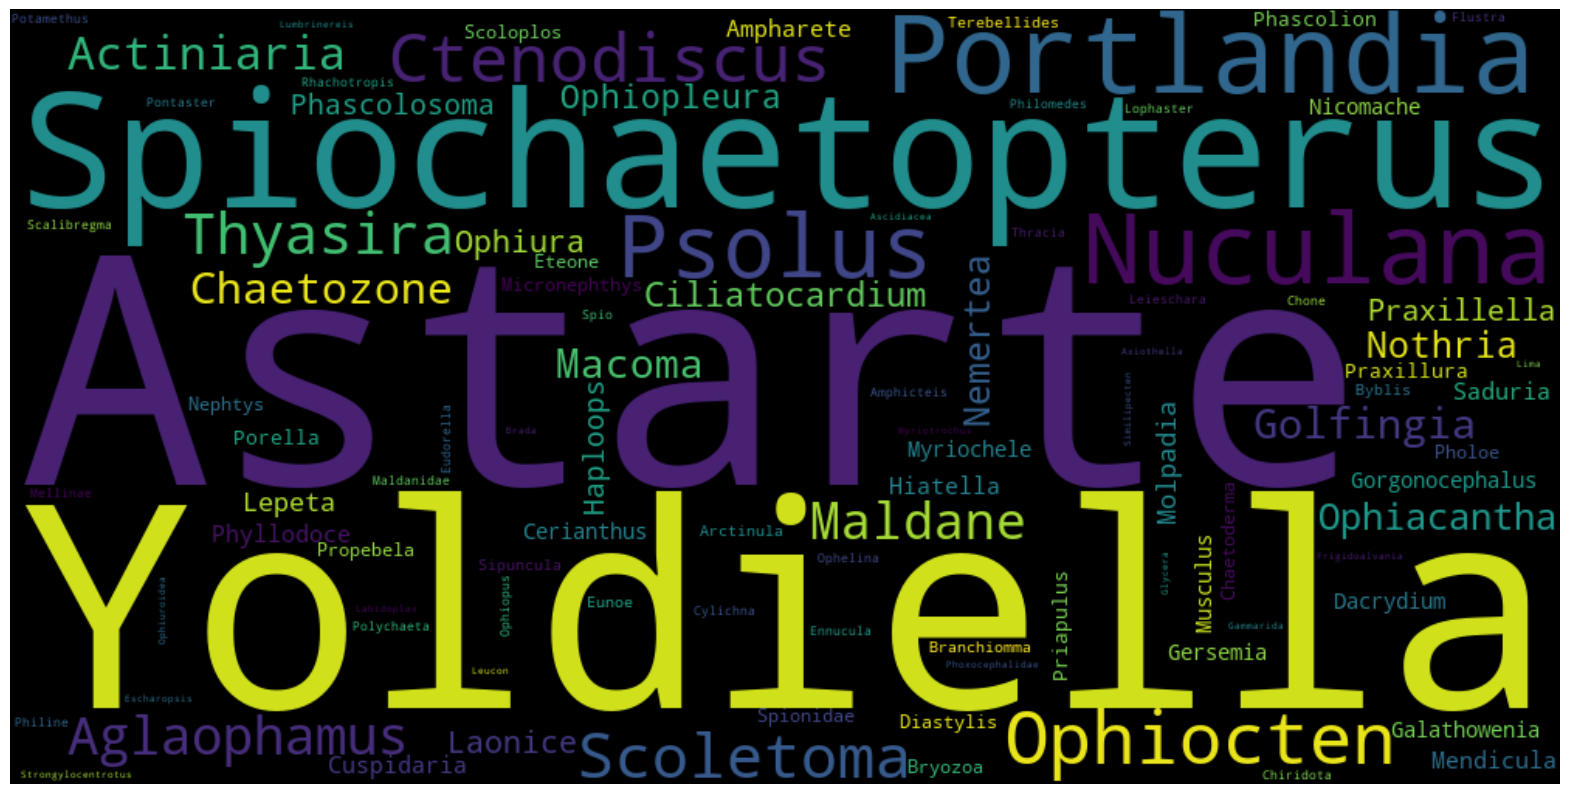

In [6]:
# simple wordcloud
plt.figure(figsize=(20,20))
WC=WordCloud(width=1000,height=500,max_words=100, min_font_size=5, collocations=False)
cloud=WC.generate(text_raw)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('11_worldcloud_species.jpg', bbox_inches='tight', pad_inches = 0)
plt.show

In [7]:
# wordcloud with mask
from PIL import Image
original_image = Image.open('bs.jpg')
#image = original_image.resize([1500,1000])
image = original_image
image = image.convert("L")
threshold = 210
image = image.point(
    lambda x: 255 if x > threshold else 0
)
image.show()

image = np.array(image)
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

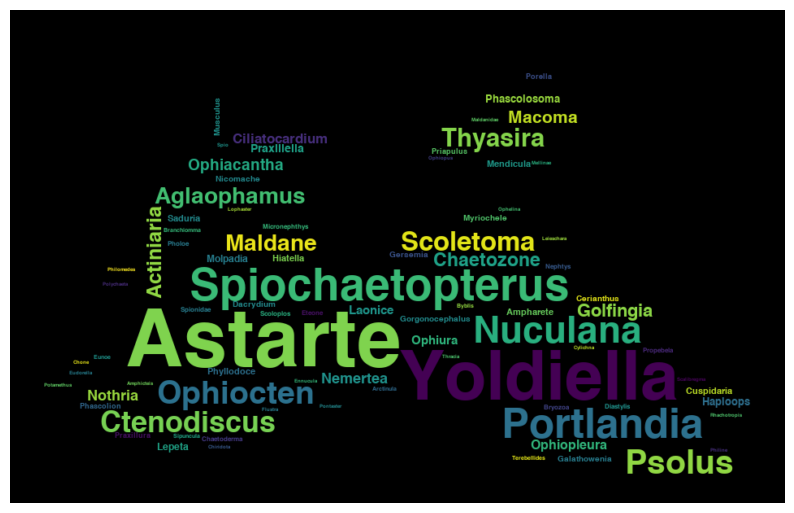

In [8]:
plt.figure(figsize=(10,10))
WC=WordCloud(font_path='Helvetica-Bold.ttf',
    width=original_image.size[0],height=original_image.size[1],max_words=500, min_font_size=5, mask=image, background_color='black', collocations=False)
cloud=WC.generate(text_raw)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('12_worldcloud_species_with_mask.jpg', bbox_inches='tight', pad_inches = 0)
plt.show

In [9]:
#  wordcloud with transparanse backgroud combination with other image
 
background_image = Image.open('bs.jpg').convert("RGBA")
#background_image = background_image.resize([1500, 1000])

#mask_image = Image.open(path + 'fortress2.jpg')
#mask_image = mask_image.resize(background_image.size)
mask_image = background_image.convert("L")
threshold = 210
mask_image = mask_image.point(
    lambda x: 255 if x > threshold else 0
)
image = np.array(mask_image)

WC=WordCloud(font_path='Helvetica-Bold.ttf',
    width=background_image.size[0],height=background_image.size[1],max_words=500, min_font_size=5, mask=image, collocations=False, background_color=None, mode='RGBA', colormap='gist_yarg_r')#background_color='#D1D1D1')
cloud=WC.generate(text_raw)

wc_image = cloud.to_image()
#wc_image = wc_image.resize(background_image.size)
combined_image = Image.alpha_composite(background_image, wc_image)
combined_image.save( '13_worldcloud_species_image_back.png')

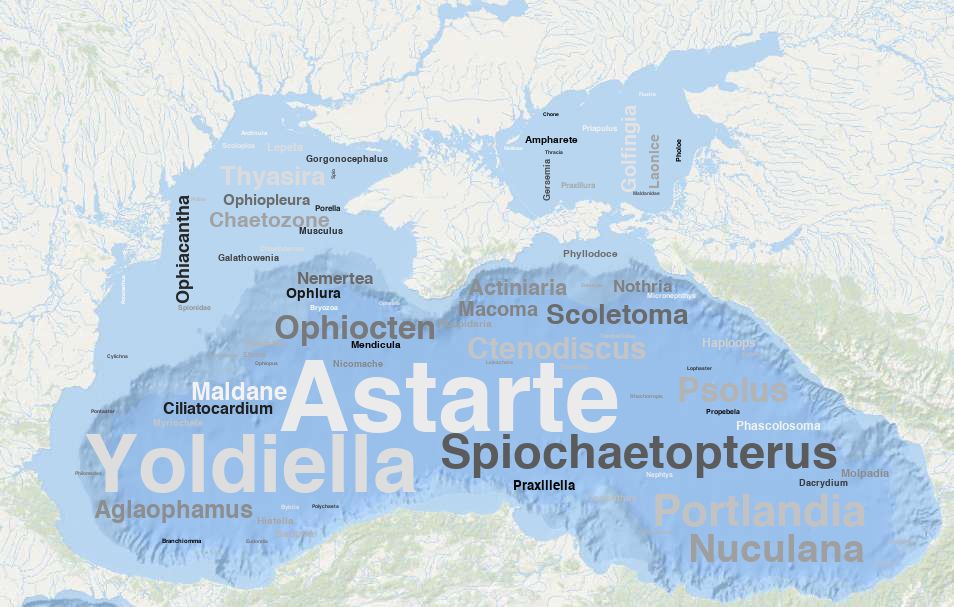

In [10]:
combined_image